# Figure 11: Probabilitiy neighbourhood infection observed $1$st, $2$nd,...,$6$th in each neighbourhood

## Abby Barlow, University of Bath
## Ben Adams, University of Bath

### Importing required libraries

In [1]:
%matplotlib inline
import time
import numpy as np
import pylab as plt
import random
import multiprocessing as mp
from scipy.optimize import fsolve
from numpy import unique
from numpy import where
from sklearn.cluster import Birch
import pandas as pd
import itertools

### *Run Figure 9 notebook first*

### Loading previous results

In [2]:
# the file paths need to be changed to your own file path
file_path = 'C:/Users/abby2/Documents/SAMBa/Demographic clustering project/Publication_results/seq_count.csv'
file_path2 = 'C:/Users/abby2/Documents/SAMBa/Demographic clustering project/Publication_results/number_of_outbreaks.csv'

# Load the data from the CSV file into a pandas DataFrame
seq_count_nu = pd.read_csv(file_path, header=None) 
neighs = np.arange(0,6,1)                       # creating array of all the possible neighbourhood infection
seqs = list(itertools.permutations(neighs,6))   # sequences

seq_counts_nu = np.zeros(len(seqs))
seq_counts_nu[:] = seq_count_nu.iloc[:, 0]  # reformat as an array
number_of_outbreaks = pd.read_csv(file_path2, header=None)
num_out = number_of_outbreaks.iloc[:, 0][0]

data = np.zeros((len(seqs),len(seqs)))
data[:,1] = seq_counts_nu/num_out
data[:,0] = np.arange(0,len(seqs),1)

y_coordinates = data[:, 1].reshape(-1, 1)

In [3]:
#file_path = 'C:/Users/abby2/Documents/SAMBa/Demographic clustering project/Publication_results/top_count.csv'
#top_count = pd.read_csv(file_path, header=None)
file_path = 'C:/Users/abby2/Documents/SAMBa/Demographic clustering project/Publication_results/top_seqs.csv'
top_seqs = pd.read_csv(file_path, header=None)
top_seqs

,0,1,2,3,4,5
0,5.0,0.0,2.0,4.0,3.0,1.0
1,5.0,0.0,2.0,4.0,3.0,1.0
2,5.0,0.0,2.0,4.0,3.0,1.0
3,5.0,0.0,2.0,4.0,3.0,1.0
4,5.0,0.0,2.0,4.0,3.0,1.0
...,...,...,...,...,...,...
2177,5.0,4.0,2.0,0.0,3.0,1.0
2178,5.0,4.0,2.0,0.0,3.0,1.0
2179,5.0,4.0,2.0,0.0,1.0,3.0
2180,5.0,4.0,2.0,0.0,1.0,3.0


### Producing figure

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


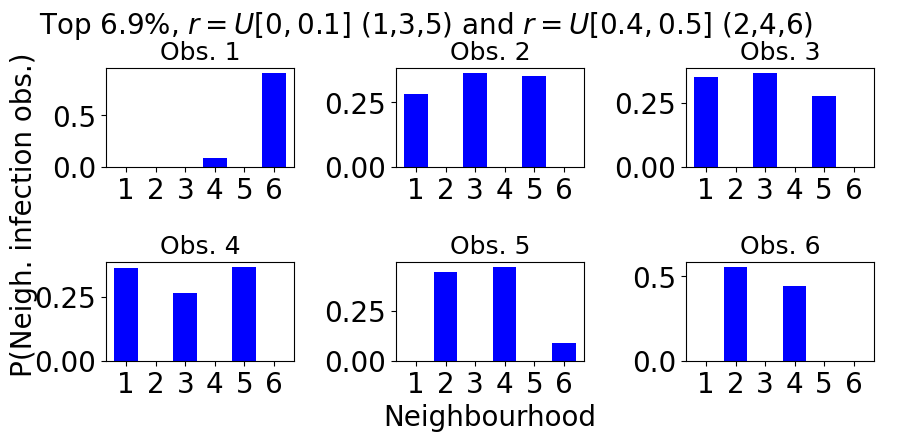

In [4]:
# plotting the proportion of times infection observed 1st, 2nd, 3rd,...,6th in each neighbourhood 
# in the sequences that occur in 'top seqs'

N_neigh = 6
plt.rcParams.update({'font.size': 20})
figure = plt.figure(figsize=(10,5)) 

x = ['1', '2', '3', '4', '5', '6']
x_pos = [i for i, _ in enumerate(x)]

for i in range(N_neigh):     # looping over first, second, ..., sixth neighbourhood outbreak observed
    plt.subplot(2,3,i+1)
    plt.bar(x_pos, np.bincount(top_seqs.iloc[:,i],minlength=N_neigh)/len(top_seqs.iloc[:,i]), color='blue')
    plt.xticks([0,1,2,3,4,5], labels = [1,2,3,4,5,6], color='black', fontsize=20)
    plt.yticks(color='black', fontsize=20)
    plt.title('Obs. {}'.format(i+1),fontsize=18)
    plt.grid(False)
    plt.tight_layout()
figure.add_subplot(111, frame_on=False)
plt.grid(False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.ylabel("P(Neigh. infection obs.)", labelpad=10, color='black', fontsize=20)
plt.xlabel("Neighbourhood", color='black', fontsize=20)
plt.tight_layout()
plt.suptitle(r'Top $6.9\%$, $r=U[0,0.1]$ (1,3,5) and $r=U[0.4,0.5]$ (2,4,6)', fontsize=20)

plt.savefig('top_seqs_nu3.pdf', bbox_inches='tight')